# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(combined_data.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [2]:
# Checking the number of mice.
number_of_mice = combined_data['Mouse ID'].nunique()
print(f"Number of unique mice in the study: {number_of_mice}")

Number of unique mice in the study: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_rows = combined_data[combined_data.duplicated(['Mouse ID', 'Timepoint'])]

# Extracting the IDs of duplicate mice
duplicate_mice_ids = duplicate_rows['Mouse ID'].unique()
print("Duplicate mice IDs:", duplicate_mice_ids)

Duplicate mice IDs: ['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouse_data = combined_data[combined_data['Mouse ID'] == 'g989']

# Displaying the data for the duplicate mouse ID
print(duplicate_mouse_data)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26       

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = combined_data[combined_data['Mouse ID'] != 'g989']

# Displaying the clean DataFrame
print(clean_data.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [6]:
# Checking the number of mice in the clean DataFrame.

unique_mice_in_clean_data = clean_data['Mouse ID'].nunique()
print(f"Number of unique mice in the clean DataFrame: {unique_mice_in_clean_data}")


Number of unique mice in the clean DataFrame: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
grouped_regimen = clean_data.groupby('Drug Regimen')


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
mean_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].median()
variance_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].var()
std_dev_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].std()
sem_tumor_volume = grouped_regimen['Tumor Volume (mm3)'].sem()

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_statistics = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_dev_tumor_volume,
    "Tumor Volume Std. Err.": sem_tumor_volume
})

summary_statistics


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_aggregated = clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean='mean',
    median='median',
    var='var',
    std='std',
    sem='sem'
)

summary_statistics_aggregated

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

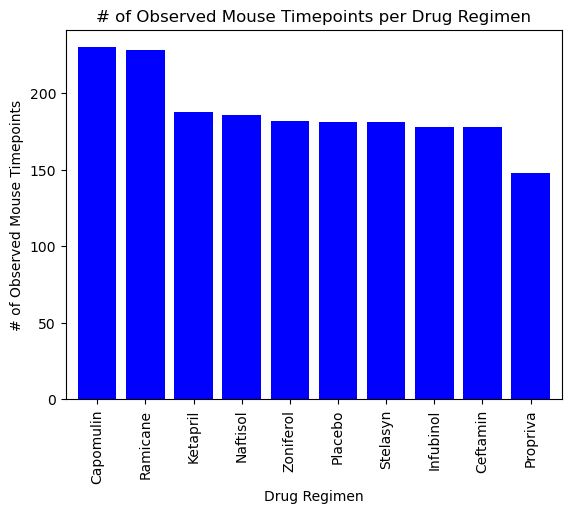

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Counting the number of observations for each drug regimen
regimen_counts = clean_data['Drug Regimen'].value_counts()

# Generating a bar plot using Pandas
regimen_counts.plot(kind='bar', color='b', width=0.8)
plt.title('# of Observed Mouse Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

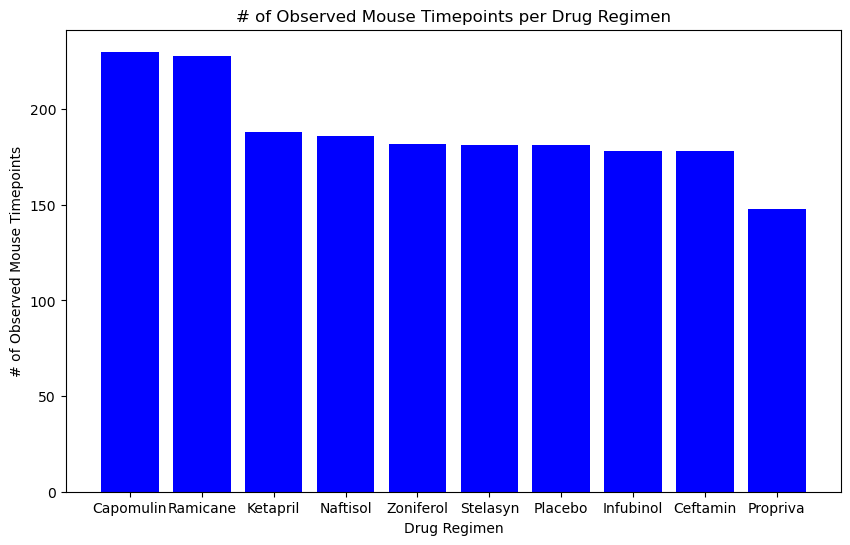

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

regimen_counts = clean_data['Drug Regimen'].value_counts()

# Setting the order for the bars in the plot
order = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva']
regimen_counts = regimen_counts[order]

# Generating a bar plot using pyplot
plt.figure(figsize=(10,6))
plt.bar(regimen_counts.index, regimen_counts.values, color='b')
plt.title('# of Observed Mouse Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

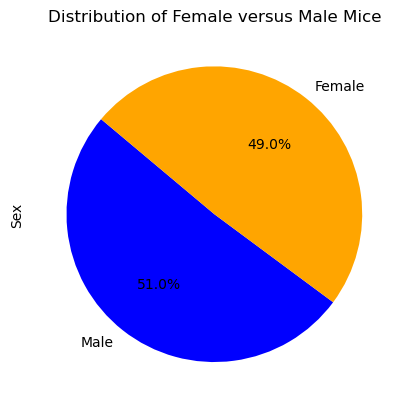

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_distribution = clean_data['Sex'].value_counts()

# Generating a pie plot using Pandas
pie_plot = sex_distribution.plot.pie(autopct='%1.1f%%', colors=['blue', 'orange'], startangle=140, labels=['Male', 'Female'])
pie_plot.set_ylabel('Sex')  # Setting the y-label to 'Sex'
plt.title('Distribution of Female versus Male Mice')
plt.show()

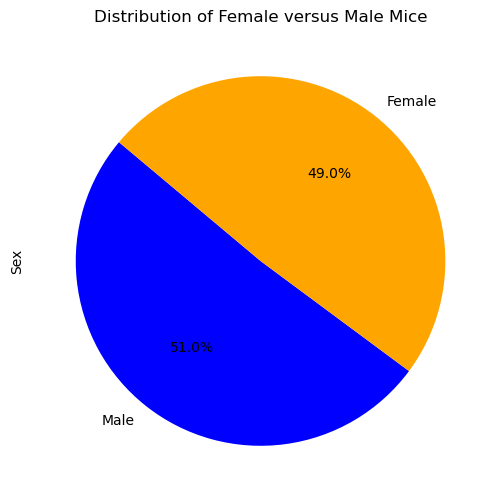

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_distribution = clean_data['Sex'].value_counts()

# Generating a pie plot using pyplot
plt.figure(figsize=(6,6))
plt.pie(sex_distribution, labels=sex_distribution.index, colors=['blue', 'orange'], autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Female versus Male Mice')
plt.ylabel('Sex')  # Setting the y-label to 'Sex'
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

last_timepoint = clean_data.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_timepoint.head()

# Start by getting the last (greatest) timepoint for each mouse



# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, clean_data, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume.head()

# Filter for only the mice on the Capomulin, Ramicane, Infubinol, and Ceftamin regimens
final_volume_filtered = final_tumor_volume[final_tumor_volume['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
final_volume_filtered.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Loop through each drug
for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_volume = final_volume_filtered[final_volume_filtered['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = final_volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Add subset to tumor volume list for plotting
    tumor_vol_list.append(final_volume)
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = final_volume[(final_volume < lower_bound) | (final_volume > upper_bound)]
    
    # Print the potential outliers
    print(f"{drug}'s potential outliers: {outliers}")



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


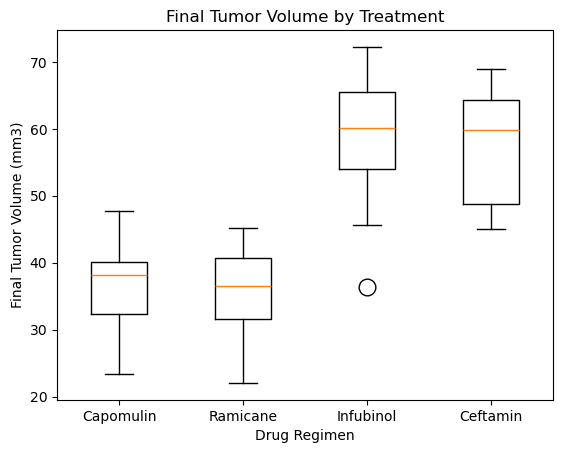

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Treatments list from earlier
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Fill the list with tumor volume data for each treatment
for drug in treatments:
    final_volume = final_volume_filtered[final_volume_filtered['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_vol_list.append(final_volume)

# Generate the box plot
fig, ax = plt.subplots()
ax.boxplot(tumor_vol_list, flierprops=dict(marker='o', color='red', markersize=12))
ax.set_title('Final Tumor Volume by Treatment')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xticklabels(treatments)

plt.show()

## Line and Scatter Plots

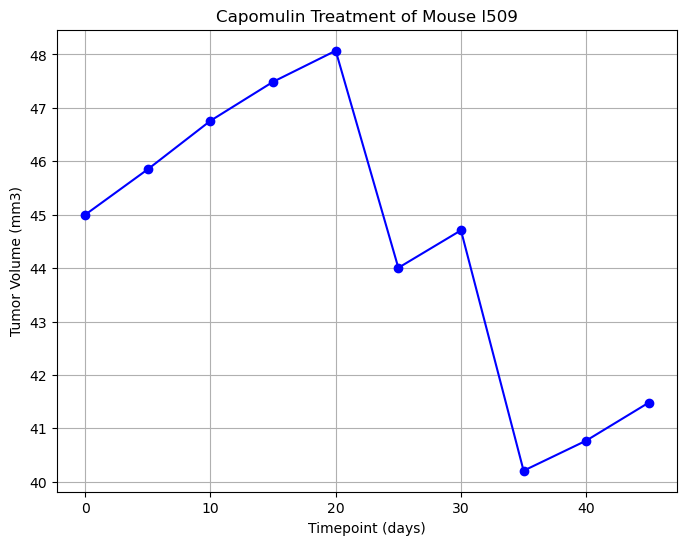

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

mouse_data = clean_data[(clean_data['Drug Regimen'] == 'Capomulin') & (clean_data['Mouse ID'] == 'l509')]

# Generate the line plot
plt.figure(figsize=(8,6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='b', linestyle='-')
plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(True)
plt.show()

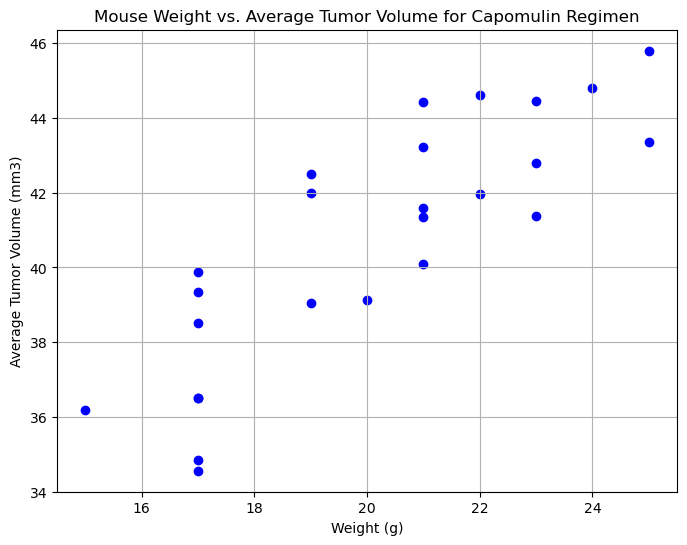

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = clean_data[clean_data['Drug Regimen'] == 'Capomulin']

# Group by 'Mouse ID' to calculate the average tumor volume and mean weight for each mouse
capomulin_avg = capomulin_data.groupby('Mouse ID').agg({
    'Tumor Volume (mm3)': 'mean',
    'Weight (g)': 'mean'
})

# Generate the scatter plot
plt.figure(figsize=(8,6))
plt.scatter(capomulin_avg['Weight (g)'], capomulin_avg['Tumor Volume (mm3)'], color='b')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84.


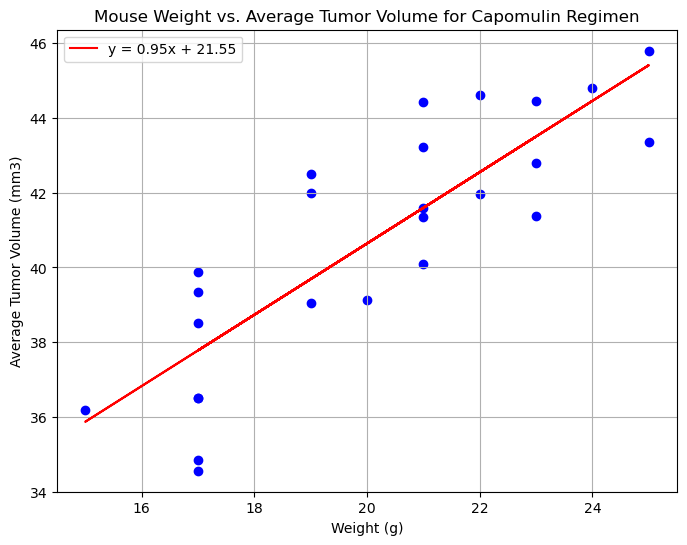

Linear regression equation: y = 0.95x + 21.55


In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x = capomulin_avg['Weight (g)']
y = capomulin_avg['Tumor Volume (mm3)']

# Calculate the correlation coefficient
correlation = np.corrcoef(x, y)[0, 1]
print(f"The correlation between mouse weight and the average tumor volume is {correlation:.2f}.")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Create equation of line to calculate predicted tumor volume
line = slope * x + intercept

# Plotting the scatter plot
plt.figure(figsize=(8,6))
plt.scatter(x, y, color='blue')
plt.plot(x, line, 'r-', label=f'y = {slope:.2f}x + {intercept:.2f}')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.grid(True)
plt.legend()

# Show the plot
plt.show()

# Print linear regression results
print(f"Linear regression equation: y = {slope:.2f}x + {intercept:.2f}")